In [2]:
from modules.bag_reader.bag_reader import READER
import cv2 
import numpy as np
import pandas as pd 

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
data = READER('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-24-00-07-50.bag')
data

[INFO]  Successfully created the data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-24-00-07-50.


In [4]:
data.read()


images saved


In [11]:
depth = np.load(data.depth_df.np_path[1])
print(depth)
print(depth.shape)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1913. 1914. 1922.]
 [   0.    0.    0. ... 1913. 1913. 1912.]
 [   0.    0.    0. ... 1934. 1934. 1934.]]
(360, 640)


In [48]:
width = depth.shape[0]
length = depth.shape[1]
w_sections = np.linspace(0,width,4)
print(w_sections)
l_sections = np.linspace(0,length,5)
print(l_sections)

[  0. 120. 240. 360.]
[  0. 160. 320. 480. 640.]


In [49]:
d11 = depth[:int(w_sections[1]),:int(l_sections[1])]
print(d11.shape)


(120, 160)


In [50]:
# take the local average
print(d11.mean())
# take the standard deviation
print(d11.std())


1133.9529
554.52466


In [66]:
tiles = [depth[x:x+int(w_sections[1]),y:y+int(l_sections[1])] for x in range(0,depth.shape[0],int(w_sections[1])) for y in range(0,depth.shape[1],int(l_sections[1]))]
tiles_array = np.array(tiles)
print(tiles_array)
print(tiles_array.shape)
print(tiles_array[1].shape)

[[[   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  ...
  [   0.    0.    0. ... 1943. 1962. 1976.]
  [   0.    0.    0. ... 1941. 1962. 1976.]
  [   0.    0.    0. ... 1940. 1961. 1970.]]

 [[   0.  425. 1799. ...    0.    0.    0.]
  [   0.    0.  426. ...    0.    0.    0.]
  [   0.    0.  424. ...    0.    0.    0.]
  ...
  [1993. 2008. 2024. ...  605.  604.  600.]
  [1993. 2012. 2021. ...  605.  603.  601.]
  [1987. 2002. 2019. ...  607.  604.  601.]]

 [[   0.    0.    0. ...    0.    0.    0.]
  [   0.    0.    0. ...    0.    0.    0.]
  [ 485.  486.  484. ...    0.    0.    0.]
  ...
  [ 600.  599.  596. ... 4056. 4042. 4014.]
  [ 600.  600.  597. ... 4050. 4016. 4011.]
  [ 601.  600.  599. ... 4050. 4000. 3985.]]

 ...

 [[1942. 1957. 1972. ...    0.    0.    0.]
  [1944. 1958. 1971. ...    0.    0.    0.]
  [1944. 1957. 1971. ...    0.    0.    0.]
  ...
  [1820. 1816. 1814. ... 1314. 1314. 131

In [88]:
mean_array = np.array([tiles_array[x].mean() for x in range(12)])
print(mean_array)
print(mean_array.shape)

[1133.9529  824.4948 1518.685  3016.8005 1122.9701 1433.6927 1601.8435
 2770.032  1271.8414 1796.6615 1830.4033 2034.8541]
(12,)


In [91]:
std_array = np.array([tiles_array[x].std() for x in range(12)])
print(std_array)
print(std_array.shape)

[ 554.52466 1068.032   1650.7367  1516.8564   612.8216  1136.455
 1299.0245   497.85715  521.82837 1044.0288   704.1571   706.1373 ]
(12,)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
img = np.load('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56/depth/vals/np_values000053.npy')
#img = np.array(img, dtype=np.float32)
        # Normalize the depth image to fall between 0 (black) and 1 (white)
cv2.normalize(img, img, 0, 1, cv2.NORM_MINMAX)
        # At this point you can display the result properly:
        # cv2.imshow('Depth Image', depth_display_image)
        # If you write it as it si, the result will be a image with only 0 to 1 values.
        # To actually store in a this a image like the one we are showing its needed
        # to reescale the otuput to 255 gray scale.
cv2.imwrite('capture_depth.png',img*255)
img = cv2.imread('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/scripts/capture_depth.png')


In [4]:
def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv2.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv2.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

True

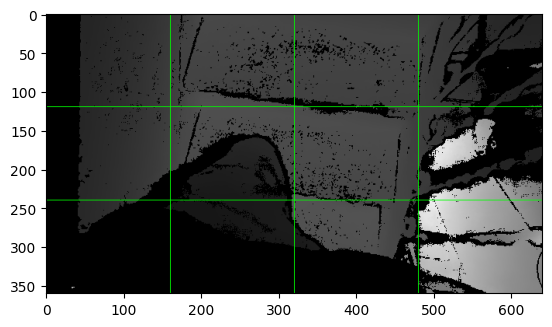

In [5]:
img_grid = draw_grid(img, (3,4))
plt.imshow(img_grid)
cv2.imwrite('regions_depth.jpg',img_grid)
